<a href="https://colab.research.google.com/github/seoho0529/TensorFlow/blob/main/tfc16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [2]:
import tensorflow as tf
import sys
import numpy as np
import keras
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[0])  # 0번째 feature
print(y_train[0])  # 0번째 label  9

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']
print(set(y_train))

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0 

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same',\
                              activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Flatten(),

    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Dense(units=10, activation='softmax'),
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 32)         

Epoch 1/500
375/375 - 8s - loss: 0.8863 - accuracy: 0.6708 - val_loss: 0.4819 - val_accuracy: 0.8284 - 8s/epoch - 20ms/step
Epoch 2/500
375/375 - 2s - loss: 0.5467 - accuracy: 0.8031 - val_loss: 0.3987 - val_accuracy: 0.8545 - 2s/epoch - 5ms/step
Epoch 3/500
375/375 - 2s - loss: 0.4719 - accuracy: 0.8297 - val_loss: 0.3631 - val_accuracy: 0.8703 - 2s/epoch - 5ms/step
Epoch 4/500
375/375 - 2s - loss: 0.4361 - accuracy: 0.8455 - val_loss: 0.3430 - val_accuracy: 0.8740 - 2s/epoch - 5ms/step
Epoch 5/500
375/375 - 3s - loss: 0.4099 - accuracy: 0.8559 - val_loss: 0.3148 - val_accuracy: 0.8859 - 3s/epoch - 8ms/step
Epoch 6/500
375/375 - 2s - loss: 0.3865 - accuracy: 0.8636 - val_loss: 0.2980 - val_accuracy: 0.8921 - 2s/epoch - 5ms/step
Epoch 7/500
375/375 - 2s - loss: 0.3688 - accuracy: 0.8692 - val_loss: 0.2912 - val_accuracy: 0.8962 - 2s/epoch - 5ms/step
Epoch 8/500
375/375 - 2s - loss: 0.3554 - accuracy: 0.8742 - val_loss: 0.2785 - val_accuracy: 0.8978 - 2s/epoch - 5ms/step
Epoch 9/500
375

Exception ignored in: <function _xla_gc_callback at 0x7a6eefb380d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


313/313 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.9159
train_loss, train_acc :  0.16538041830062866 0.9380000233650208
test_loss, test_acc :  0.23967251181602478 0.9158999919891357


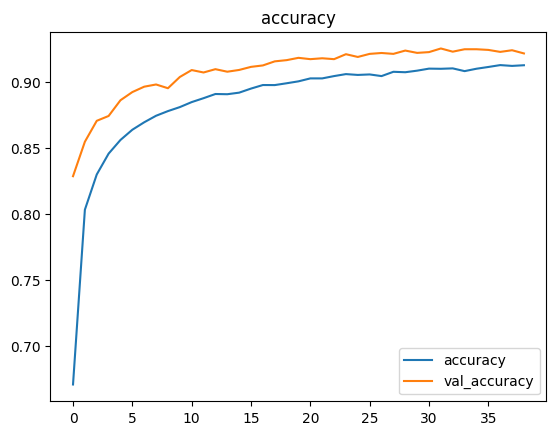

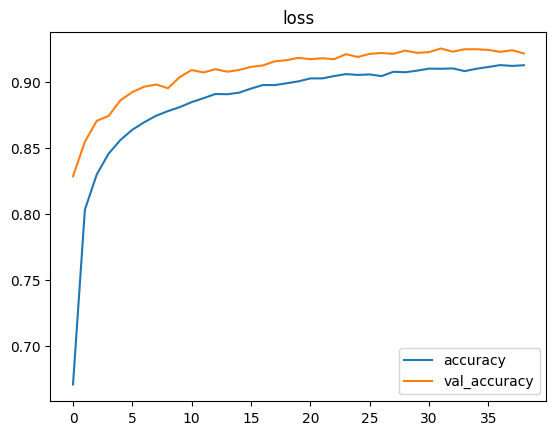

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=2,
                     validation_split=0.2,
                     callbacks=[es])

print(history.history)

# 모델평가
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc : ', train_loss, train_acc)
print('test_loss, test_acc : ', test_loss, test_acc)


history = history.history


def plot_acc(title = None):
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.legend()

plot_acc('accuracy')
plt.show()

def plot_loss(title = None):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title(title)
    plt.legend()

plot_acc('loss')
plt.show()

In [8]:
 # VGGNet style 네트워크

# dataset은 Fashion MNIST with CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 256)       295168    
                                                      

Epoch 1/500
375/375 [==============================] - 13s 25ms/step - loss: 0.6454 - accuracy: 0.7616 - val_loss: 0.3404 - val_accuracy: 0.8730
Epoch 2/500
375/375 [==============================] - 9s 24ms/step - loss: 0.3781 - accuracy: 0.8627 - val_loss: 0.2902 - val_accuracy: 0.8927
Epoch 3/500
375/375 [==============================] - 8s 22ms/step - loss: 0.3212 - accuracy: 0.8843 - val_loss: 0.2619 - val_accuracy: 0.9004
Epoch 4/500
375/375 [==============================] - 8s 22ms/step - loss: 0.2821 - accuracy: 0.8991 - val_loss: 0.2290 - val_accuracy: 0.9162
Epoch 5/500
375/375 [==============================] - 8s 22ms/step - loss: 0.2588 - accuracy: 0.9069 - val_loss: 0.2166 - val_accuracy: 0.9218
Epoch 6/500
375/375 [==============================] - 8s 22ms/step - loss: 0.2483 - accuracy: 0.9116 - val_loss: 0.2116 - val_accuracy: 0.9245
Epoch 7/500
375/375 [==============================] - 8s 22ms/step - loss: 0.2325 - accuracy: 0.9165 - val_loss: 0.2039 - val_accuracy

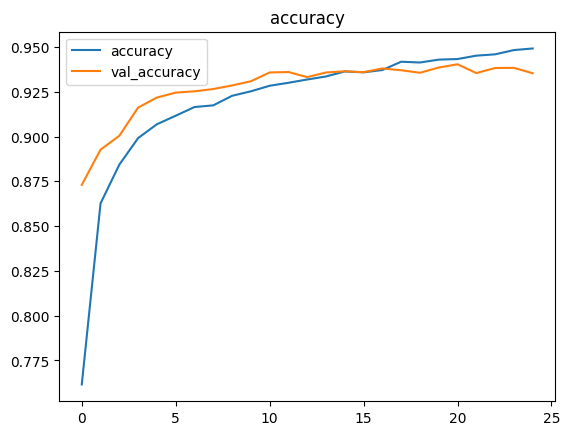

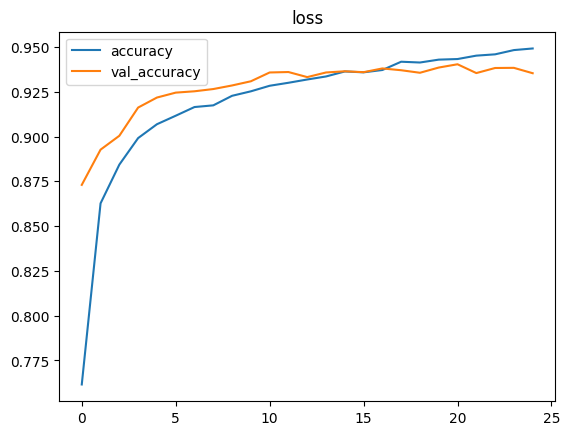

In [9]:
es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2,
                     callbacks=[es])

print(history.history)

# 모델평가
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc : ', train_loss, train_acc)
print('test_loss, test_acc : ', test_loss, test_acc)


history = history.history


def plot_acc(title = None):
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.legend()

plot_acc('accuracy')
plt.show()

def plot_loss(title = None):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title(title)
    plt.legend()

plot_acc('loss')
plt.show()